<a href="https://colab.research.google.com/github/0xpix/CERI-Project/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Earth Engine

## Upload the project

In [ ]:
import os
os.chdir("/content")

from google.colab import files
uploaded = files.upload()

!ls

Saving CERI-Project-main.zip to CERI-Project-main.zip
CERI-Project-main.zip  sample_data  ssh-colab  ssh.tar.gz  ssh_.zip


In [ ]:
%%capture
!unzip /content/CERI-Project-main.zip

# Become one with the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# read the excel file (Displacement Data)
Displacement_raw_data = pd.read_excel('CERI-Project-main/data/raw/IDMC_GIDD_Disasters_Internal_Displacement_Data.xlsx')

# read the excel file (Displacement Data)
Climate_raw_data = pd.read_excel('CERI-Project-main/data/raw/emdat_Climate_Disasters.xlsx')

## Displacement Data

In [ ]:
Displacement_raw_data.columns # Show columns names

Index(['ISO3', 'Country / Territory', 'Year', 'Event Name',
       'Date of Event (start)', 'Disaster Internal Displacements',
       'Disaster Internal Displacements (Raw)', 'Hazard Category',
       'Hazard Type', 'Hazard Sub Type', 'Event Codes (Code:Type)'],
      dtype='object')

In [ ]:
# Array of the relevent columns
columns = ['Country / Territory', 'Date of Event (start)',
           'Disaster Internal Displacements (Raw)', 'Hazard Sub Type']

# Create the data with the relevent columns
displacement_data_with_selected_columns = Displacement_raw_data[columns]
displacement_data_with_selected_columns.tail()

,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
13112,Indonesia,2022-12-31,18030,Flood
13113,Indonesia,2022-12-31,1756,Flood
13114,Indonesia,2022-12-31,38920,Flood
13115,Indonesia,2022-12-31,250,Flood
13116,Indonesia,2022-12-31,155,Flood


In [ ]:
#
displacement_data_with_selected_columns[displacement_data_with_selected_columns['Country / Territory'] == 'South Africa'].head(2)

,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
157,South Africa,2008-11-14,3500,Storm
301,South Africa,2009-01-01,20000,Flood


In [ ]:
# the names of Sub-Saharan countries
country_names = ["Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon",
                "Cape Verde", "Central African Republic", "Chad", "Comoros",
                "Congo (Brazzaville)", "Congo (Democratic Republic)", "Côte d'Ivoire",
                "Djibouti", "Equatorial Guinea", "Eritrea", "Ethiopia", "Gabon",
                "The Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho",
                "Liberia", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
                "Mozambique", "Namibia", "Niger", "Nigeria", "Réunion", "Rwanda",
                "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone",
                "Somalia", "South Africa", "Sudan", "Swaziland", "Tanzania", "Togo",
                "Uganda", "Western Sahara", "Zambia", "Zimbabwe"]

# Create the data with Sub-Saharan countries only
sub_saharan_displacement_data = displacement_data_with_selected_columns[displacement_data_with_selected_columns['Country / Territory'].isin(country_names)].reset_index(drop=True)
sub_saharan_displacement_data.head(3)

,Country / Territory,Date of Event (start),Disaster Internal Displacements (Raw),Hazard Sub Type
0,Togo,2008-01-07,2000,Flood
1,Mozambique,2008-01-09,3000,Wildfire
2,Rwanda,2008-01-10,5000,Flood


In [ ]:
displacement_data_with_selected_columns['Hazard Sub Type'].value_counts()

Hazard Sub Type
Flood                          5966
Storm                          2655
Landslide/Wet mass movement    1282
Wildfire                       1260
Typhoon/Hurricane/Cyclone       549
Earthquake                      444
Tornado                         317
Volcanic activity               106
Cold wave                       103
Hailstorm                        91
Dry mass movement                76
Drought                          64
Winter storm/Blizzard            52
Avalanche                        40
Dam release flood                27
Storm surge                      24
Erosion                          20
Rogue Wave                       18
Sinkhole                         12
Tsunami                           4
Unknown                           4
Heat wave                         2
Sand/dust storm                   1
Name: count, dtype: int64

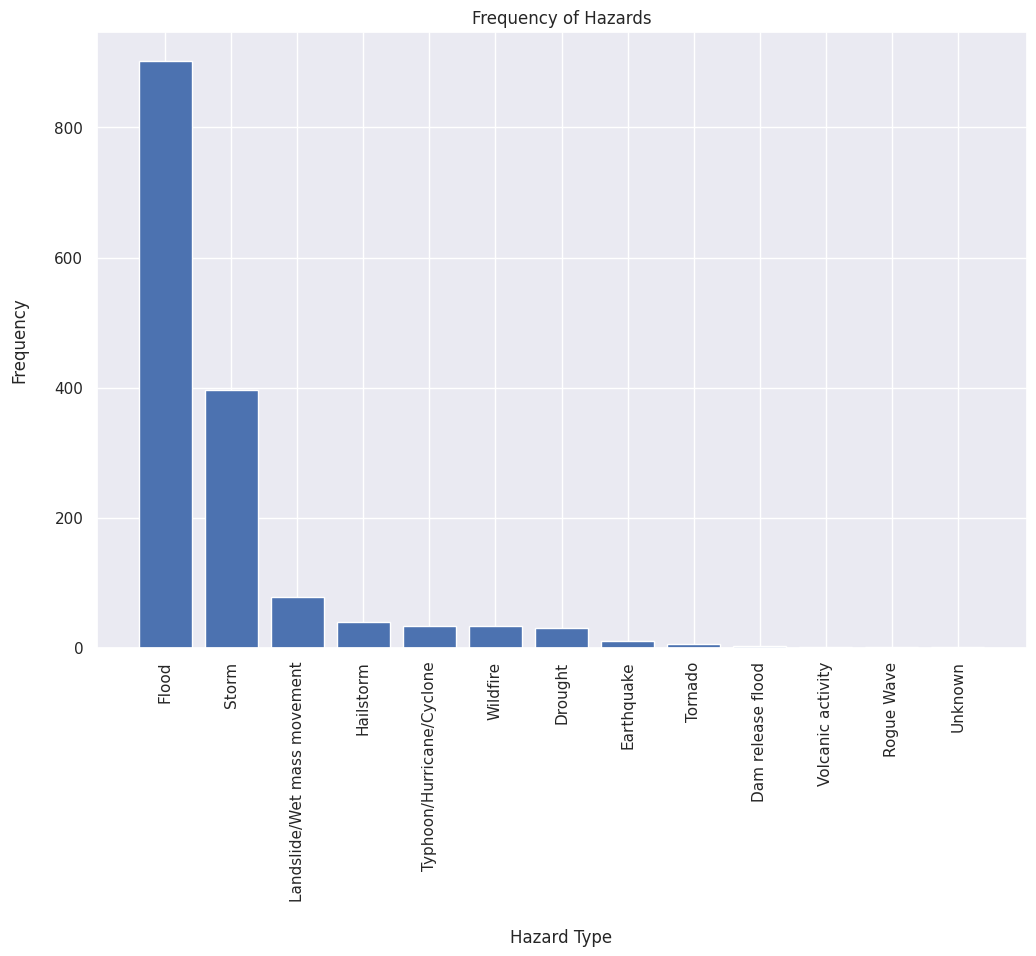

In [ ]:
# Visualizing the frequency of the Disasters
hazard_frequency = sub_saharan_displacement_data['Hazard Sub Type'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(hazard_frequency.index, hazard_frequency.values)
plt.xlabel('\nHazard Type')
plt.ylabel('Frequency\n')
plt.title('Frequency of Hazards')

plt.xticks(rotation=90)
plt.show()

## Climate Disasters Data

In [ ]:
Climate_raw_data.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [ ]:
# Array of the relevent columns
columns = ['Disaster Type', 'Country', 'Subregion',
           'Start Year', 'Start Month', 'Start Day',
           'End Year', 'End Month', 'End Day']

# Create the data with the relevent columns
climate_data_with_selected_columns = Climate_raw_data[columns]
climate_data_with_selected_columns.tail()

,Disaster Type,Country,Subregion,Start Year,Start Month,Start Day,End Year,End Month,End Day
2119,Storm,South Africa,Sub-Saharan Africa,2024,4.0,8.0,2024,4.0,8.0
2120,Flood,Kenya,Sub-Saharan Africa,2024,4.0,11.0,2024,4.0,12.0
2121,Mass movement (wet),Democratic Republic of the Congo,Sub-Saharan Africa,2024,4.0,13.0,2024,4.0,13.0
2122,Flood,Uganda,Sub-Saharan Africa,2024,4.0,NaN,2024,4.0,19.0
2123,Flood,Somalia,Sub-Saharan Africa,2024,4.0,19.0,2024,4.0,22.0


In [ ]:
# Create the data with Sub-Saharan countries only
sub_saharan_climate_data = climate_data_with_selected_columns[climate_data_with_selected_columns['Subregion'] == 'Sub-Saharan Africa'].reset_index(drop=True)
sub_saharan_climate_data.tail(8)

,Disaster Type,Country,Subregion,Start Year,Start Month,Start Day,End Year,End Month,End Day
1932,Storm,Madagascar,Sub-Saharan Africa,2024,3.0,26.0,2024,3.0,29.0
1933,Storm,Nigeria,Sub-Saharan Africa,2024,4.0,3.0,2024,4.0,3.0
1934,Flood,United Republic of Tanzania,Sub-Saharan Africa,2024,4.0,2.0,2024,4.0,15.0
1935,Storm,South Africa,Sub-Saharan Africa,2024,4.0,8.0,2024,4.0,8.0
1936,Flood,Kenya,Sub-Saharan Africa,2024,4.0,11.0,2024,4.0,12.0
1937,Mass movement (wet),Democratic Republic of the Congo,Sub-Saharan Africa,2024,4.0,13.0,2024,4.0,13.0
1938,Flood,Uganda,Sub-Saharan Africa,2024,4.0,NaN,2024,4.0,19.0
1939,Flood,Somalia,Sub-Saharan Africa,2024,4.0,19.0,2024,4.0,22.0


In [ ]:
sub_saharan_climate_data['Subregion'].value_counts()

Subregion
Sub-Saharan Africa    1940
Name: count, dtype: int64

In [ ]:
sub_saharan_climate_data['Disaster Type'].value_counts()

Disaster Type
Flood                  858
Epidemic               568
Storm                  216
Drought                165
Mass movement (wet)     58
Earthquake              22
Wildfire                20
Infestation             19
Volcanic activity       10
Extreme temperature      3
Animal incident          1
Name: count, dtype: int64

In [ ]:
# Create a filter
disaster_filter = 'Flood'

# Group by Year and Disaster Type and count frequency
disaster_counts = sub_saharan_climate_data.groupby(['Start Year', 'Disaster Type']).size().reset_index(name='Frequency')

# Filter the data
filtered_data = disaster_counts[disaster_counts['Disaster Type'] == disaster_filter]
filtered_data.head()

,Start Year,Disaster Type,Frequency
3,2000,Flood,31
10,2001,Flood,33
19,2002,Flood,25
26,2003,Flood,33
32,2004,Flood,24


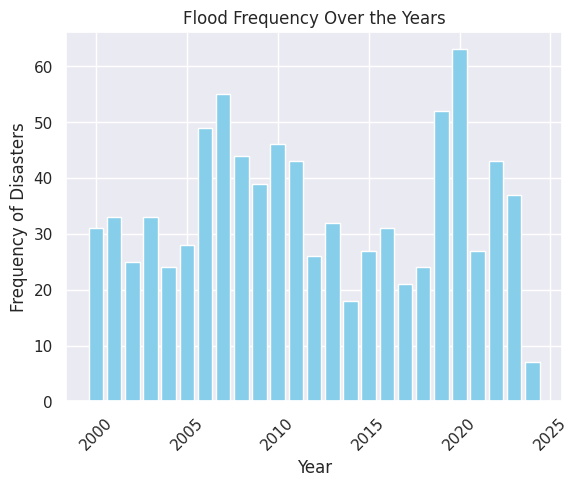

In [ ]:
# Create a bar plot for the filtered disaster
plt.bar(filtered_data['Start Year'], filtered_data['Frequency'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Frequency of Disasters')
plt.title(f'{disaster_filter} Frequency Over the Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

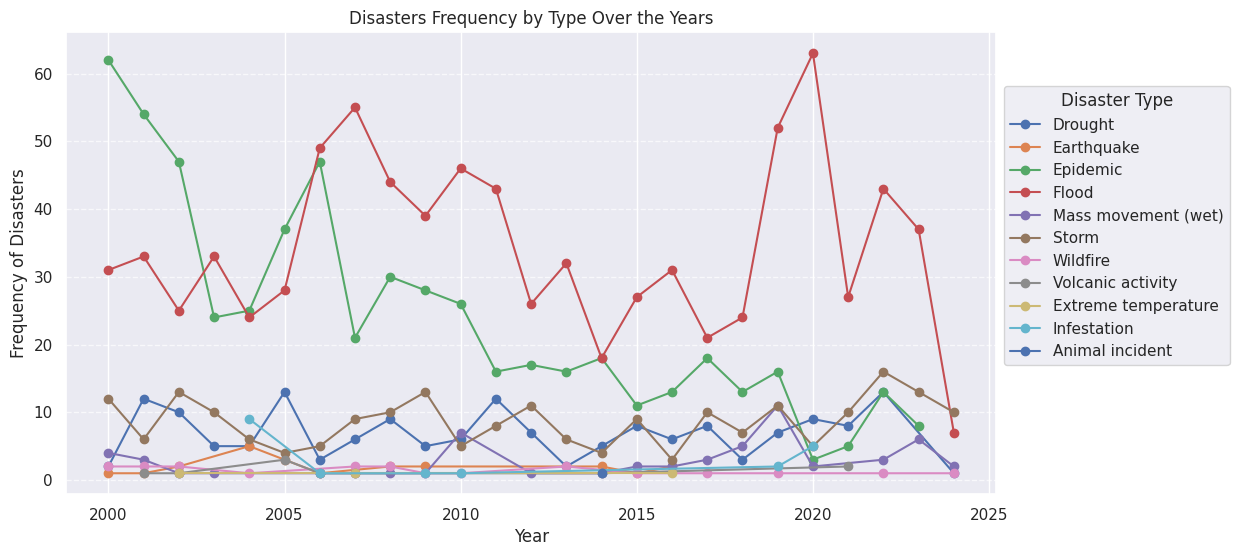

In [ ]:
# Create a time series plot
plt.figure(figsize=(12, 6))
for disaster_type in disaster_counts['Disaster Type'].unique():
    subset = disaster_counts[disaster_counts['Disaster Type'] == disaster_type]
    plt.plot(subset['Start Year'], subset['Frequency'], marker='o', label=disaster_type)

plt.xlabel('Year')
plt.ylabel('Frequency of Disasters')
plt.title('Disasters Frequency by Type Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Disaster Type', bbox_to_anchor=(1, 0.9), loc='upper left')
plt.show()

# Google Earth Engine

In [27]:
%%capture
!pip install -U geemap # Upgrade geemap to the latest version

#import Libraries
import ee
import geemap

# GEE authentication
ee.Authenticate()
ee.Initialize(project='aims-ai2324-std-aness-9fl')

In [24]:
geemap.__version__ # geemap version

'0.32.1'

In [34]:
''' Customizing the map
center ([lat, lon]), zoom, width, and height.
data_ctrl=False, toolbar_ctrl=False, draw_ctrl=False
'''
m = geemap.Map(center=[0,10], zoom=3.5, height=900, width='70%', toolbar_ctrl=False) # Create a map
m # Display the map

Map(center=[0, 10], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(child…